# Entrenamiento de red Feedforward 

Con el dataset creado anteriormente con 1000 características y una columna para clase, vamos a entrenar la red FF con múltiples corridas guardando cada una

In [15]:
#Llamamos las librerías
import numpy as np
import pandas as pd
!pip install tensorflow-gpu
import tensorflow as tf
from tensorflow import keras

In [16]:
#Llamamos el dataset a un dataframe de pandas
dataset = pd.read_csv("/content/drive/My Drive/ConteoEIdentificacionDeTrafico/Feedforward/DataSet_NoVehiculo_Vehiculo.csv")
#Ahora lo dividimos en salida y entrada, la salida es la última columna
#0 indica NO VEHICULO
#1 indica VEHICULO
Y = dataset[dataset.columns[-1]]
X = dataset[dataset.columns[:-1]]
#Separamos en Test y Train con ayuda de sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [19]:
history = []
for i in range(1,10):
    modelo = Sequential()
    modelo.add(Dense(100,input_shape=(1000,),activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))
    modelo.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal',bias_initializer='zeros'))
    mcp_save = ModelCheckpoint('/content/drive/My Drive/ConteoEIdentificacionDeTrafico/Feedforward/arq1_'+str(i)+'.hdf5', save_best_only=True, monitor='val_loss', mode='min',save_weights_only=False)
    modelo.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001), loss='binary_crossentropy',metrics=['acc'])
    history.append(modelo.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=32,callbacks=[mcp_save]))
modelo.summary()

Epoch 1/30
161/161 [==============================] - 1s 6ms/step - loss: 0.6773 - acc: 0.6073 - val_loss: 0.6742 - val_acc: 0.6315
Epoch 2/30
161/161 [==============================] - 1s 3ms/step - loss: 0.6423 - acc: 0.6687 - val_loss: 0.6525 - val_acc: 0.6788
Epoch 3/30
161/161 [==============================] - 1s 3ms/step - loss: 0.6179 - acc: 0.7105 - val_loss: 0.6328 - val_acc: 0.7111
Epoch 4/30
161/161 [==============================] - 1s 3ms/step - loss: 0.5964 - acc: 0.7386 - val_loss: 0.6141 - val_acc: 0.7293
Epoch 5/30
161/161 [==============================] - 1s 3ms/step - loss: 0.5764 - acc: 0.7567 - val_loss: 0.5976 - val_acc: 0.7452
Epoch 6/30
161/161 [==============================] - 1s 3ms/step - loss: 0.5578 - acc: 0.7714 - val_loss: 0.5815 - val_acc: 0.7571
Epoch 7/30
161/161 [==============================] - 1s 3ms/step - loss: 0.5401 - acc: 0.7819 - val_loss: 0.5660 - val_acc: 0.7721
Epoch 8/30
161/161 [==============================] - 1s 3ms/step - loss: 0.

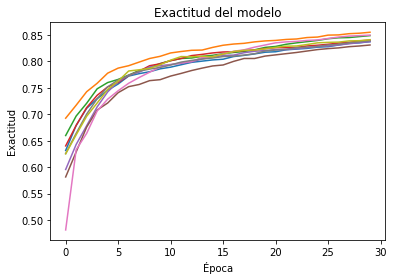

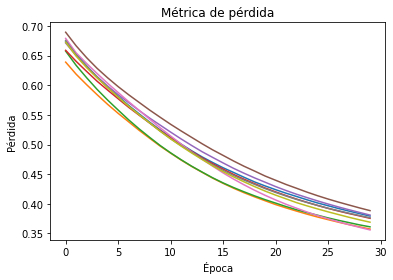

In [20]:
from matplotlib import pyplot as plt
for i in range(len(history)):
  plt.plot(history[i].history['val_acc'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.show()
# "Loss"
for i in range(len(history)):
  plt.plot(history[i].history['val_loss'])
plt.title('Métrica de pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()